**Authors:** Jozef Hanč, Martina Hančová <br> 
[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN) *P. J. Šafárik University in Košice, Slovakia* <br> 
email: [jozef.hanc@upjs.sk](mailto:jozef.hanc@upjs.sk)

***
**<font size=6 color=brown> Introduction</font>** 

**<font size=4> Scholarly literature on Jupyter $-$ basic descriptive statistics</font>**  


<font size=4> Computational tool: </font> **<font size=4> Scientific Python - Pandas </font>**

# Data

Numbers of papers in four scholar databases

In [1]:
# load data as dataframe df
file = '../Data/00_Scholarly-literature.xlsx'
filename = file.split('.')[0]
df = pd.read_excel(file)
df

,database,keywords in search,2015,2016,2017,2018,2019
0,Google Scholar,jupyter,206,913,1900,3750,5840
1,Google Scholar,"jupyter, education",49,242,588,1210,1810
2,Google Scholar,"jupyter, higher education",3,19,66,158,250
3,Google Scholar,"jupyter, multimedia learning",0,2,1,1,6
4,SCOPUS,jupyter,3,28,53,116,156
5,SCOPUS,"jupyter, education",0,3,11,27,34
6,SCOPUS,"jupyter, higher education",0,0,2,2,8
7,WOS,jupyter,4,22,36,84,100
8,WOS,"jupyter, education",0,1,3,7,5
9,WOS,"jupyter, higher education",0,0,0,0,1


In [2]:
# dataframe columns 
cols = list(df.columns)
print(cols)

['database', 'keywords in search', 2015, 2016, 2017, 2018, 2019]


# Numerical summary

In [3]:
# multi-index in table
multidx = ['database', 'keywords in search']
dfi = df.set_index(multidx).sort_index()
dfi

2015  2016  2017  2018  2019
database       keywords in search                                        
Google Scholar jupyter                        206   913  1900  3750  5840
               jupyter, education              49   242   588  1210  1810
               jupyter, higher education        3    19    66   158   250
               jupyter, multimedia learning     0     2     1     1     6
SCOPUS         jupyter                          3    28    53   116   156
               jupyter, education               0     3    11    27    34
               jupyter, higher education        0     0     2     2     8
WOS            jupyter                          4    22    36    84   100
               jupyter, education               0     1     3     7     5
               jupyter, higher education        0     0     0     0     1
arxiv.org      jupyter                          1     6    14    31    32
               jupyter, education               0     0     1     0     3

In [4]:
# latex code for table
subs = {'toprule':'hline', 'midrule':'hline', 'bottomrule':'hline'}

latex_code = dfi.to_latex()
latex_code = replace_all(latex_code, subs)

print(latex_code)

\begin{tabular}{llrrrrr}
\hline
          &                    &  2015 &  2016 &  2017 &  2018 &  2019 \\
database & keywords in search &       &       &       &       &       \\
\hline
Google Scholar & jupyter &   206 &   913 &  1900 &  3750 &  5840 \\
          & jupyter, education &    49 &   242 &   588 &  1210 &  1810 \\
          & jupyter, higher education &     3 &    19 &    66 &   158 &   250 \\
          & jupyter, multimedia learning &     0 &     2 &     1 &     1 &     6 \\
SCOPUS & jupyter &     3 &    28 &    53 &   116 &   156 \\
          & jupyter, education &     0 &     3 &    11 &    27 &    34 \\
          & jupyter, higher education &     0 &     0 &     2 &     2 &     8 \\
WOS & jupyter &     4 &    22 &    36 &    84 &   100 \\
          & jupyter, education &     0 &     1 &     3 &     7 &     5 \\
          & jupyter, higher education &     0 &     0 &     0 &     0 &     1 \\
arxiv.org & jupyter &     1 &     6 &    14 &    31 &    32 \\
          & jupyt

# Graphical summary

In [5]:
# transposing table and removing zeros by nan values
dff = dfi.transpose().replace({0:np.nan})
dff

database           Google Scholar                     \
keywords in search        jupyter jupyter, education   
2015                        206.0               49.0   
2016                        913.0              242.0   
2017                       1900.0              588.0   
2018                       3750.0             1210.0   
2019                       5840.0             1810.0   

database                                                                   \
keywords in search jupyter, higher education jupyter, multimedia learning   
2015                                     3.0                          NaN   
2016                                    19.0                          2.0   
2017                                    66.0                          1.0   
2018                                   158.0                          1.0   
2019                                   250.0                          6.0   

database            SCOPUS                                               \
keywords in search jupyter jupyter, education jupyter, higher education   
2015                   3.0                NaN                       NaN   
2016                  28.0                3.0                       NaN   
2017                  53.0               11.0                       2.0   
2018                 116.0               27.0                       2.0   
2019                 156.0               34.0                       8.0   

database               WOS                                               \
keywords in search jupyter jupyter, education jupyter, higher education   
2015                   4.0                NaN                       NaN   
2016                  22.0                1.0                       NaN   
2017                  36.0                3.0                       NaN   
2018                  84.0                7.0                       NaN   
2019                 100.0                5.0                       1.0   

database           arxiv.org                     
keywords in search   jupyter jupyter, education  
2015                     1.0                NaN  
2016                     6.0                NaN  
2017                    14.0                1.0  
2018                    31.0                NaN  
2019                    32.0                3.0

## Graphical parameters

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import product

name = 'ScholarLiterature.png'
typ = 'bar'
resolution = 300
font ='large'
size = (10,10)
legend_title = 'Keywords in database search (log scale y axis)'
path = '/media/sf_D_DRIVE/Dropbox/00 publikacie/Didaktika/2019Jupyter/clanok/figures/'
factor = [1.08, 1.04, 1.04, 1.03]

## Plots

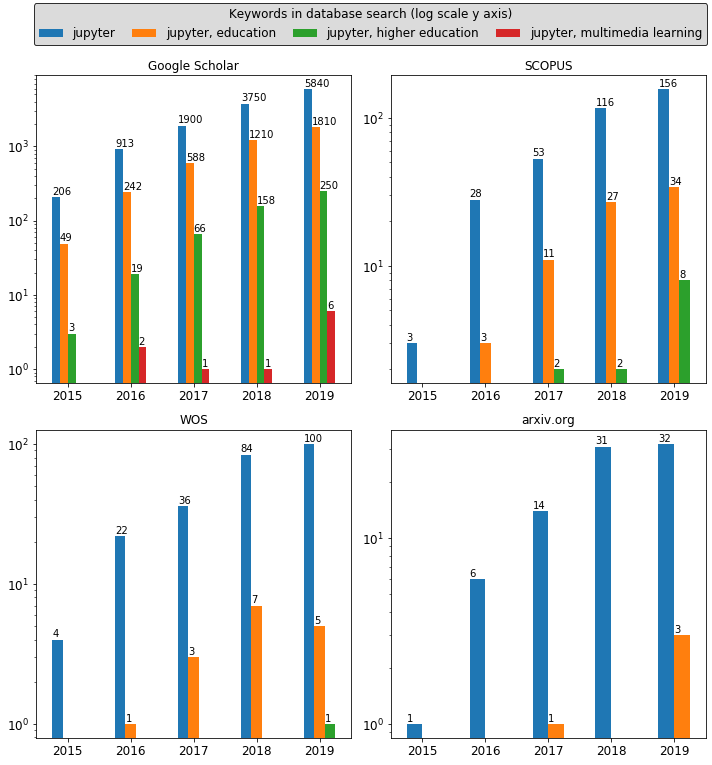

In [7]:
# initial plot setup
fig, axes = plt.subplots(nrows=2, ncols=2,  figsize=size)
position = list(product([0,1], repeat=2))
databases = dff.columns.levels[0]
f = {databases[i]:factor[i] for i in range(len(factor))}

# generate plots for databases
for database, pos in zip(databases, position):
    g = dff[database].plot(kind = typ, ax=axes[pos],legend=False,fontsize=font, rot=0)
    g.set_title(database)
    if database == databases[0]: 
        handles, labels = g.get_legend_handles_labels()
    for p in g.patches:
        if p.get_height()>0:
            x, y = p.get_x(), p.get_height()
            g.annotate(str(y)[:-2], (x, y*f[database]), fontsize=10) 
    g.set_yscale('log')
        
# legend for final figure
legend = fig.legend(handles, labels, 
          bbox_to_anchor=(0.047,1,0.935,0.1), 
          loc="lower center", mode="expand", 
          borderaxespad=0, ncol=len(databases),
          title = legend_title,
          fontsize =font,
          title_fontsize =font
         )

legend.get_frame().set_edgecolor('black')
legend.get_frame().set_facecolor('lightgrey')

# tight layout - smallest spaces among subplots
plt.tight_layout()

#save figure
#fig.savefig(name, bbox_extra_artists=(legend,), bbox_inches='tight', dpi=resolution)
#fig.savefig(path+name, bbox_extra_artists=(legend,), bbox_inches='tight', dpi=resolution)